# Dask

In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [2]:
index = pd.date_range("2021-09-01", periods=2400, freq="1h")
df = pd.DataFrame({"a": np.arange(2400), "b": list("abcaddbe" * 300)}, index=index)
ddf = dd.from_pandas(df, npartitions=10)
ddf.head()

,a,b
2021-09-01 00:00:00,0,a
2021-09-01 01:00:00,1,b
2021-09-01 02:00:00,2,c
2021-09-01 03:00:00,3,a
2021-09-01 04:00:00,4,d


In [3]:
ddf.divisions

(Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-09-11 00:00:00'),
 Timestamp('2021-09-21 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-10-11 00:00:00'),
 Timestamp('2021-10-21 00:00:00'),
 Timestamp('2021-10-31 00:00:00'),
 Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-11-20 00:00:00'),
 Timestamp('2021-11-30 00:00:00'),
 Timestamp('2021-12-09 23:00:00'))

In [4]:
ddf.a.mean()

<dask_expr.expr.Scalar: expr=df['a'].mean(), dtype=float64>

Ленивые вычисления

In [5]:
ddf.a.mean().compute()

np.float64(1199.5)

In [6]:
ddf.a.cumsum()

Dask Series Structure:
npartitions=10
2021-09-01 00:00:00    int64
2021-09-11 00:00:00      ...
                       ...  
2021-11-30 00:00:00      ...
2021-12-09 23:00:00      ...
Dask Name: cumsum, 3 expressions
Expr=CumSum(frame=df['a'], skipna=True)

In [7]:
ddf.a.cumsum().compute().iloc[-1]

np.int64(2878800)

In [ ]:
res = ddf.a.cumsum()

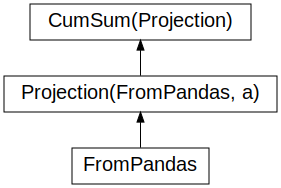

In [9]:
res.visualize()